# Understanding the Emotional Effects on GitHub Issue Lifecycles

##### Objective: Investigate how different emotions expressed in GitHub issue comments influence the lifecycle of the issues.
##### Motivation: Understanding emotional impacts can help in better issue management and prioritization.

## Data Preprocessing

##### Delete data['commentList.user.type'] that are not 'User'
##### Delete the issues that dont have any comments
##### Drop rows with missing comments
##### Remove duplicate rows
##### selected the most used tag names
##### converted duration (closed_at - created_at) to days and rounded by (0)
##### selected durations less than 100 days
##### ı did some operations for extra feature for my model
##### then ı dropped unnecessary columns
##### after data preprocessing my dataset columns are ['id','commentList.body','user_activity', 'total_reactions', 'positive_reactions', 'negative_reactions', 'reaction_ratio', 'label_count', 'update_frequency','duration']

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
# Read dataset from PC
data = pd.read_csv("combined_file.csv")
label_data = pd.read_csv("label_response.csv")

In [2]:
# Check if 'label_name' exists and change it to 'tag_name'
if 'label_name' in label_data:
    label_data['tag_name'] = label_data.pop('label_name')

In [3]:
label_data = label_data.dropna(subset=['tag_name'])

In [4]:
print(label_data.columns)

Index(['id', 'number', 'label_description', 'label_default', 'tag_name'], dtype='object')


In [7]:
print(data.columns)

Index(['id', 'number', 'title', 'state', 'locked', 'comments', 'created_at',
       'updated_at', 'closed_at', 'author_association', 'user.id',
       'user.login', 'user.type', 'user.siteAdmin', 'commentList.id',
       'commentList.user.id', 'commentList.user.login',
       'commentList.user.type', 'commentList.user.siteAdmin',
       'commentList.created_at', 'commentList.updated_at',
       'commentList.authorAssociation', 'commentList.body',
       'commentList.reactions.like', 'commentList.reactions.dislike',
       'commentList.reactions.laugh', 'commentList.reactions.hooray',
       'commentList.reactions.confused', 'commentList.reactions.heart',
       'commentList.reactions.rocket', 'commentList.reactions.eyes'],
      dtype='object')


In [8]:
data['commentList.user.type']

0        User
1         NaN
2        User
3         NaN
4         NaN
         ... 
43208    User
43209     NaN
43210    User
43211     NaN
43212     NaN
Name: commentList.user.type, Length: 43213, dtype: object

In [9]:
unique_values = data['commentList.user.type'].unique()
print(unique_values)

['User' nan 'Bot']


In [10]:
# Drop rows with missing comments
data = data.dropna(subset=['commentList.body'])

In [11]:
#Drop bot messages
data = data[data['commentList.user.type'] == 'User']

In [12]:
# Remove duplicate rows
data = data.drop_duplicates()

In [13]:
unique_values = data['user.type'].unique()
print(unique_values)

['User' 'Bot']


In [14]:
data = data[data['user.type'] == 'User']

In [15]:
data['comments']

0        1
2        1
15       1
26       1
27       3
        ..
43205    5
43206    5
43207    5
43208    5
43210    1
Name: comments, Length: 36188, dtype: int64

In [16]:
data = data[data['comments'] > 0]

In [18]:
print(data.columns)

Index(['id', 'number', 'title', 'state', 'locked', 'comments', 'created_at',
       'updated_at', 'closed_at', 'author_association', 'user.id',
       'user.login', 'user.type', 'user.siteAdmin', 'commentList.id',
       'commentList.user.id', 'commentList.user.login',
       'commentList.user.type', 'commentList.user.siteAdmin',
       'commentList.created_at', 'commentList.updated_at',
       'commentList.authorAssociation', 'commentList.body',
       'commentList.reactions.like', 'commentList.reactions.dislike',
       'commentList.reactions.laugh', 'commentList.reactions.hooray',
       'commentList.reactions.confused', 'commentList.reactions.heart',
       'commentList.reactions.rocket', 'commentList.reactions.eyes'],
      dtype='object')


In [19]:
# Emotional reaction counts
reaction_columns = ['commentList.reactions.like', 'commentList.reactions.dislike', 'commentList.reactions.laugh',
                    'commentList.reactions.hooray', 'commentList.reactions.confused', 'commentList.reactions.heart',
                    'commentList.reactions.rocket', 'commentList.reactions.eyes']
data['total_reactions'] = data[reaction_columns].sum(axis=1)
data['positive_reactions'] = data[['commentList.reactions.like', 'commentList.reactions.hooray', 'commentList.reactions.heart']].sum(axis=1)
data['negative_reactions'] = data[['commentList.reactions.dislike', 'commentList.reactions.confused']].sum(axis=1)
data['reaction_ratio'] = data['positive_reactions'] / (data['negative_reactions'] + 1)

In [20]:
# User-based features
user_activity = data['user.id'].value_counts().reset_index()
user_activity.columns = ['user.id', 'user_activity']
data = pd.merge(data, user_activity, on='user.id', how='left')

In [21]:
data = pd.merge(data, label_data[['id', 'tag_name']], on='id', how='left')

In [22]:
# Label-based features
label_counts = label_data.groupby('number').size().reset_index(name='label_count')
data = pd.merge(data, label_counts, on='number', how='left')

In [23]:
# Fill missing label counts with 0
data['label_count'] = data['label_count'].fillna(0)

In [25]:
data.dropna(subset=['tag_name'], inplace=True)

In [26]:
tags_to_keep = ['info-needed', 'bug', 'verified', 'insiders-released', 'feature-request', '*duplicate', 'triage-needed', '*caused-by-extension']

In [27]:
# Filter the DataFrame to keep only rows with tag_name in the list of tags to keep
data = data[data['tag_name'].isin(tags_to_keep)]

In [28]:
# Optionally, reset the index if needed
data.reset_index(drop=True, inplace=True)

In [29]:
data

,id,number,title,state,locked,comments,created_at,updated_at,closed_at,author_association,...,commentList.reactions.heart,commentList.reactions.rocket,commentList.reactions.eyes,total_reactions,positive_reactions,negative_reactions,reaction_ratio,user_activity,tag_name,label_count
0,2305839232,213062,VS Code auto save on window change doesn't wor...,closed,False,3,2024-05-20T12:00:01.000+00:00,2024-05-21T04:57:59.000+00:00,2024-05-21T04:57:59.000+00:00,NONE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,info-needed,1.0
1,2305839232,213062,VS Code auto save on window change doesn't wor...,closed,False,3,2024-05-20T12:00:01.000+00:00,2024-05-21T04:57:59.000+00:00,2024-05-21T04:57:59.000+00:00,NONE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,info-needed,1.0
2,2305839232,213062,VS Code auto save on window change doesn't wor...,closed,False,3,2024-05-20T12:00:01.000+00:00,2024-05-21T04:57:59.000+00:00,2024-05-21T04:57:59.000+00:00,NONE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,info-needed,1.0
3,2305513429,213056,"Filter symbols in outline & breadcrumbs, keep ...",closed,False,2,2024-05-20T09:10:55.000+00:00,2024-05-20T10:14:41.000+00:00,2024-05-20T10:14:39.000+00:00,NONE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,*duplicate,1.0
4,2305513429,213056,"Filter symbols in outline & breadcrumbs, keep ...",closed,False,2,2024-05-20T09:10:55.000+00:00,2024-05-20T10:14:41.000+00:00,2024-05-20T10:14:39.000+00:00,NONE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,*duplicate,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38598,1865887642,191257,Markdown header panel doesnt reveal 4th level ...,closed,True,5,2023-08-24T21:08:28.000+00:00,2023-10-24T23:21:55.000+00:00,2023-09-09T15:33:27.000+00:00,NONE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,info-needed,1.0
38599,1865887642,191257,Markdown header panel doesnt reveal 4th level ...,closed,True,5,2023-08-24T21:08:28.000+00:00,2023-10-24T23:21:55.000+00:00,2023-09-09T15:33:27.000+00:00,NONE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,info-needed,1.0
38600,1865868592,191255,Moved Code Lines Overlap Too Much,closed,True,1,2023-08-24T20:53:56.000+00:00,2023-10-08T23:22:03.000+00:00,2023-08-24T21:15:06.000+00:00,MEMBER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112,bug,4.0
38601,1865868592,191255,Moved Code Lines Overlap Too Much,closed,True,1,2023-08-24T20:53:56.000+00:00,2023-10-08T23:22:03.000+00:00,2023-08-24T21:15:06.000+00:00,MEMBER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112,verified,4.0


In [30]:
import datetime

In [31]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_23956\2803171264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_at'] = pd.to_datetime(data['created_at'])
C:\Users\oguzhan\AppData\Local\Temp\ipykernel_23956\2803171264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['closed_at'] = pd.to_datetime(data['closed_at'])
C:\Users\oguzhan\AppData\Local\Temp\ipykernel_23956\2803171264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [32]:
data['duration'] = (data['closed_at'] - data['created_at']).dt.total_seconds() / (60 * 60 * 24)
data['duration'] = data['duration'].round().astype(int)

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_23956\1706456594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'] = (data['closed_at'] - data['created_at']).dt.total_seconds() / (60 * 60 * 24)
C:\Users\oguzhan\AppData\Local\Temp\ipykernel_23956\1706456594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'] = data['duration'].round().astype(int)


In [33]:
# Round the 'duration' column to 2 decimal places
data['duration'] = data['duration'].round(0)
# Remove outliers
data = data[data['duration'] <= 100]

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_23956\1300436063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'] = data['duration'].round(0)


In [34]:
data['update_frequency'] = data['comments'] / (data['duration'] + 1)

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_23956\859041515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['update_frequency'] = data['comments'] / (data['duration'] + 1)


In [35]:
# Define features and target
columns_to_keep = ['id','commentList.body','user_activity', 'total_reactions', 'positive_reactions', 'negative_reactions', 'reaction_ratio', 
            'label_count', 'update_frequency','duration']
data = data[columns_to_keep]

In [36]:
data

,id,commentList.body,user_activity,total_reactions,positive_reactions,negative_reactions,reaction_ratio,label_count,update_frequency,duration
0,2305839232,So this does not reproduce when you disable Al...,3,0.0,0.0,0.0,0.0,1.0,1.500000,1
1,2305839232,"Yes, with native window switching works just f...",3,0.0,0.0,0.0,0.0,1.0,1.500000,1
2,2305839232,We rely on this Electron event being fired: ht...,3,0.0,0.0,0.0,0.0,1.0,1.500000,1
3,2305513429,/duplicate of #213055,2,0.0,0.0,0.0,0.0,1.0,2.000000,0
4,2305513429,Thanks for creating this issue! We figured it'...,2,0.0,0.0,0.0,0.0,1.0,2.000000,0
...,...,...,...,...,...,...,...,...,...,...
38598,1865887642,"@mjbvz it doesn't work in the header panel, ev...",7,0.0,0.0,0.0,0.0,1.0,0.294118,16
38599,1865887642,@mjbvz this issue seems to be fixed with the l...,7,0.0,0.0,0.0,0.0,1.0,0.294118,16
38600,1865868592,It should look like this (4 crossings):![nVKUP...,112,0.0,0.0,0.0,0.0,4.0,1.000000,0
38601,1865868592,It should look like this (4 crossings):![nVKUP...,112,0.0,0.0,0.0,0.0,4.0,1.000000,0


## Text Preprocessing

#### Converted text to lowercase
#### Removed mentions starting with '@'
#### Remove special characters, numbers, and punctuations
#### Tokenize the text
#### Remove stopwords
#### Lemmatization
#### remove non-english words

In [37]:
import nltk

In [38]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [39]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove mentions starting with '@'
    text = re.sub(r'@\S+\s?', '', text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [40]:
data['commentList.body.preprocessed'] = data['commentList.body'].apply(preprocess_text)

In [41]:
data = data.drop(columns=['commentList.body'])

In [42]:
data

,id,user_activity,total_reactions,positive_reactions,negative_reactions,reaction_ratio,label_count,update_frequency,duration,commentList.body.preprocessed
0,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,reproduce disable alttab use macos builtin win...
1,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,yes native window switching work finepls check...
2,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,rely electron event fired httpsgithubcomelectr...
3,2305513429,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,duplicate
4,2305513429,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,thanks creating issue figured covering another...
...,...,...,...,...,...,...,...,...,...,...
38598,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,doesnt work header panel even extension disabl...
38599,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,issue seems fixed latest codeinsidersimagehttp...
38600,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...
38601,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...


In [43]:
from langdetect import detect

In [44]:
def remove_non_english(text):
    # Check if the text contains specific English words
    if 'agree' in text.lower() or 'english_word2' in text.lower():
        return text
    try:
        # Detect the language of the text
        lang = detect(text)
        
        # Check if the detected language is English
        if lang == 'en':
            return text
        else:
            return ''
    except:
        # If language detection fails, return empty string
        return ''

In [45]:
# Apply language filtering to the 'commentList__body' column
data['commentList.body.preprocessed'] = data['commentList.body.preprocessed'].apply(remove_non_english)

In [46]:
data = data[data['commentList.body.preprocessed'].str.strip().astype(bool)]

In [47]:
data

,id,user_activity,total_reactions,positive_reactions,negative_reactions,reaction_ratio,label_count,update_frequency,duration,commentList.body.preprocessed
0,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,reproduce disable alttab use macos builtin win...
1,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,yes native window switching work finepls check...
2,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,rely electron event fired httpsgithubcomelectr...
4,2305513429,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,thanks creating issue figured covering another...
5,2305171422,3,0.0,0.0,0.0,0.0,1.0,3.000000,0,thanks creating issue look like may using old ...
...,...,...,...,...,...,...,...,...,...,...
38598,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,doesnt work header panel even extension disabl...
38599,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,issue seems fixed latest codeinsidersimagehttp...
38600,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...
38601,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...


In [48]:
id_unique_count = data['id'].nunique()
print("Number of unique values in 'id' column:", id_unique_count)

Number of unique values in 'id' column: 6699


In [49]:
print(data.columns)

Index(['id', 'user_activity', 'total_reactions', 'positive_reactions',
       'negative_reactions', 'reaction_ratio', 'label_count',
       'update_frequency', 'duration', 'commentList.body.preprocessed'],
      dtype='object')


In [50]:
# Unique values for total_reactions
unique_total_reactions = data['total_reactions'].unique()
print(f"Unique values in 'total_reactions': {unique_total_reactions}")

# Unique values for positive_reactions
unique_positive_reactions = data['positive_reactions'].unique()
print(f"Unique values in 'positive_reactions': {unique_positive_reactions}")

# Unique values for negative_reactions
unique_negative_reactions = data['negative_reactions'].unique()
print(f"Unique values in 'negative_reactions': {unique_negative_reactions}")

# Unique values for reaction_ratio
unique_reaction_ratio = data['reaction_ratio'].unique()
print(f"Unique values in 'reaction_ratio': {unique_reaction_ratio}")

Unique values in 'total_reactions': [ 0. 67. 20. 10.  1.  2.  3. 11. 12.  6.  5.  4.  7. 14. 17.  9. 15.  8.
 13. 22.]
Unique values in 'positive_reactions': [ 0. 38. 20. 10.  1.  2.  3. 11. 12.  6.  5.  4.  7. 14. 17.  9.  8. 22.]
Unique values in 'negative_reactions': [ 0. 16.  1.  2.  7.  3.]
Unique values in 'reaction_ratio': [ 0.          2.23529412 20.         10.          1.          2.
  3.         11.         12.          6.          5.          4.
  7.         14.         17.          9.          1.5         8.
  2.5        22.        ]


In [51]:
data

,id,user_activity,total_reactions,positive_reactions,negative_reactions,reaction_ratio,label_count,update_frequency,duration,commentList.body.preprocessed
0,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,reproduce disable alttab use macos builtin win...
1,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,yes native window switching work finepls check...
2,2305839232,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,rely electron event fired httpsgithubcomelectr...
4,2305513429,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,thanks creating issue figured covering another...
5,2305171422,3,0.0,0.0,0.0,0.0,1.0,3.000000,0,thanks creating issue look like may using old ...
...,...,...,...,...,...,...,...,...,...,...
38598,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,doesnt work header panel even extension disabl...
38599,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,issue seems fixed latest codeinsidersimagehttp...
38600,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...
38601,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...


In [52]:
# Group by issue ID
grouped_data = data.groupby('id').agg({
    'user_activity': 'first',
    'total_reactions': 'first',
    'positive_reactions': 'first',
    'negative_reactions': 'first',
    'reaction_ratio': 'first',
    'label_count': 'first',
    'update_frequency': 'first',
    'duration': 'first',
    'commentList.body.preprocessed': ' '.join,
}).reset_index()

In [53]:
grouped_data

,id,user_activity,total_reactions,positive_reactions,negative_reactions,reaction_ratio,label_count,update_frequency,duration,commentList.body.preprocessed
0,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...
1,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,please share text markdown file demonstrates i...
2,1865987344,4,0.0,0.0,0.0,0.0,2.0,0.500000,3,thanks creating issue figured missing basic in...
3,1866082335,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,causedbyextensionvs code provide support java ...
4,1866109723,3,0.0,0.0,0.0,0.0,3.0,0.045455,65,dafbdaaeecfdfffc feature request candidate bac...
...,...,...,...,...,...,...,...,...,...,...
6694,2304365058,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,extpython look like caused python extension pl...
6695,2304773583,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,extpython look like caused python extension pl...
6696,2305171422,3,0.0,0.0,0.0,0.0,1.0,3.000000,0,thanks creating issue look like may using old ...
6697,2305513429,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,thanks creating issue figured covering another...


## Sentiment Analysis

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [56]:
# Function to get sentiment scores
def get_sentiment(text):
    return analyzer.polarity_scores(text)

In [57]:
# Apply sentiment analysis
grouped_data['sentiment'] = grouped_data['commentList.body.preprocessed'].apply(get_sentiment)

In [58]:
# Extract sentiment components
grouped_data['sentiment_neg'] = grouped_data['sentiment'].apply(lambda x: x['neg'])
grouped_data['sentiment_neu'] = grouped_data['sentiment'].apply(lambda x: x['neu'])
grouped_data['sentiment_pos'] = grouped_data['sentiment'].apply(lambda x: x['pos'])
grouped_data['sentiment_compound'] = grouped_data['sentiment'].apply(lambda x: x['compound'])

In [59]:
# Calculate the number of comments
grouped_data['num_comments'] = grouped_data['commentList.body.preprocessed'].apply(lambda x: len(x.split()))

In [60]:
print(grouped_data.columns)

Index(['id', 'user_activity', 'total_reactions', 'positive_reactions',
       'negative_reactions', 'reaction_ratio', 'label_count',
       'update_frequency', 'duration', 'commentList.body.preprocessed',
       'sentiment', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
       'sentiment_compound', 'num_comments'],
      dtype='object')


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

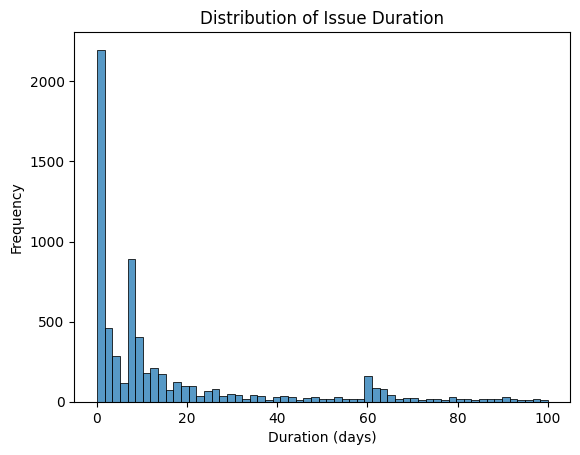

In [62]:
# Plot the distribution of issue durations
sns.histplot(grouped_data['duration'])
plt.title('Distribution of Issue Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

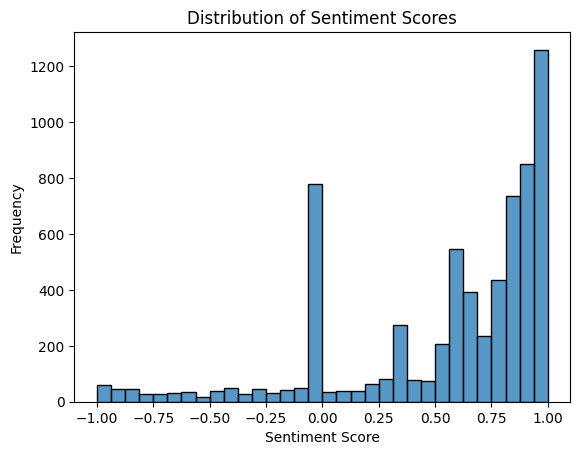

In [63]:
# Plot sentiment distribution
sns.histplot(grouped_data['sentiment_compound'])
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

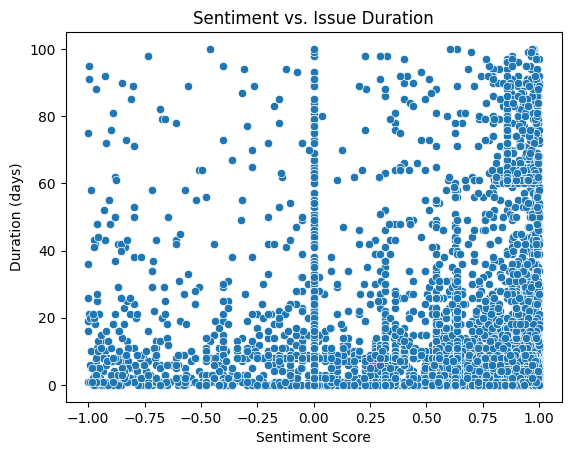

In [64]:
# Relationship between sentiment and issue duration
sns.scatterplot(x='sentiment_compound', y='duration', data=grouped_data)
plt.title('Sentiment vs. Issue Duration')
plt.xlabel('Sentiment Score')
plt.ylabel('Duration (days)')
plt.show()

In [65]:
import scipy.stats as stats

# Compare durations for positive vs negative sentiments
positive_durations = grouped_data[grouped_data['sentiment_compound'] > 0]['duration']
negative_durations = grouped_data[grouped_data['sentiment_compound'] < 0]['duration']

# Perform t-test
t_stat, p_value = stats.ttest_ind(positive_durations, negative_durations)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.184594189279245, P-value: 0.853553623364361


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [68]:
grouped_data

,id,user_activity,total_reactions,positive_reactions,negative_reactions,reaction_ratio,label_count,update_frequency,duration,commentList.body.preprocessed,sentiment,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,num_comments
0,1865868592,112,0.0,0.0,0.0,0.0,4.0,1.000000,0,look like crossingsnvkuphovehttpsgithubcommicr...,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",0.000,0.444,0.556,0.7579,9
1,1865887642,7,0.0,0.0,0.0,0.0,1.0,0.294118,16,please share text markdown file demonstrates i...,"{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'comp...",0.000,0.801,0.199,0.8271,43
2,1865987344,4,0.0,0.0,0.0,0.0,2.0,0.500000,3,thanks creating issue figured missing basic in...,"{'neg': 0.086, 'neu': 0.625, 'pos': 0.289, 'co...",0.086,0.625,0.289,0.8555,40
3,1866082335,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,causedbyextensionvs code provide support java ...,"{'neg': 0.081, 'neu': 0.763, 'pos': 0.156, 'co...",0.081,0.763,0.156,0.6124,57
4,1866109723,3,0.0,0.0,0.0,0.0,3.0,0.045455,65,dafbdaaeecfdfffc feature request candidate bac...,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.000,0.846,0.154,0.8591,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,2304365058,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,extpython look like caused python extension pl...,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.000,0.803,0.197,0.7269,32
6695,2304773583,3,0.0,0.0,0.0,0.0,1.0,1.500000,1,extpython look like caused python extension pl...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.000,0.818,0.182,0.7269,35
6696,2305171422,3,0.0,0.0,0.0,0.0,1.0,3.000000,0,thanks creating issue look like may using old ...,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.000,0.694,0.306,0.9349,46
6697,2305513429,2,0.0,0.0,0.0,0.0,1.0,2.000000,0,thanks creating issue figured covering another...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.000,0.797,0.203,0.6249,22


In [69]:
print(grouped_data.columns)

Index(['id', 'user_activity', 'total_reactions', 'positive_reactions',
       'negative_reactions', 'reaction_ratio', 'label_count',
       'update_frequency', 'duration', 'commentList.body.preprocessed',
       'sentiment', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
       'sentiment_compound', 'num_comments'],
      dtype='object')


## Emotion Analysis

In [117]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict

In [118]:
# Load NRC Emotion Lexicon
nrc_lexicon = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 
                          names=["word", "emotion", "association"], 
                          sep='\t')

In [119]:
# Create a dictionary from the lexicon
nrc_dict = defaultdict(lambda: defaultdict(int))
for _, row in nrc_lexicon.iterrows():
    nrc_dict[row['word']][row['emotion']] = row['association']

In [120]:
# Function to get emotion scores
def get_emotion_scores(text):
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    scores = defaultdict(int)
    for word in words:
        for emotion, score in nrc_dict[word].items():
            scores[emotion] += score
    return scores

In [121]:
# Apply emotion scoring to the comments
grouped_data['emotion_scores'] = grouped_data['commentList.body.preprocessed'].apply(get_emotion_scores)

In [122]:
# Create emotion columns
emotions = nrc_lexicon['emotion'].unique()
for emotion in emotions:
    grouped_data[emotion] = grouped_data['emotion_scores'].apply(lambda x: x[emotion])

In [123]:
# Calculate the number of comments
grouped_data['num_comments'] = grouped_data['commentList.body.preprocessed'].apply(lambda x: len(x.split()))

## Exploratory Data Analysis (EDA)

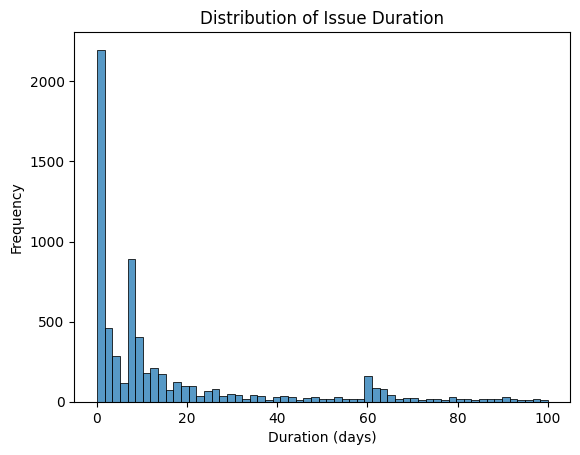

In [124]:
# Plot the distribution of issue durations
sns.histplot(grouped_data['duration'])
plt.title('Distribution of Issue Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

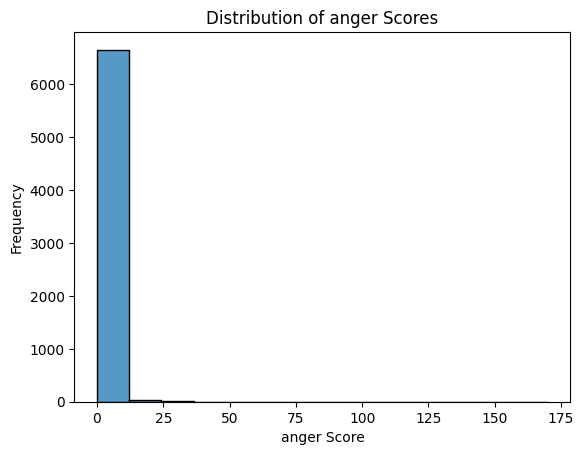

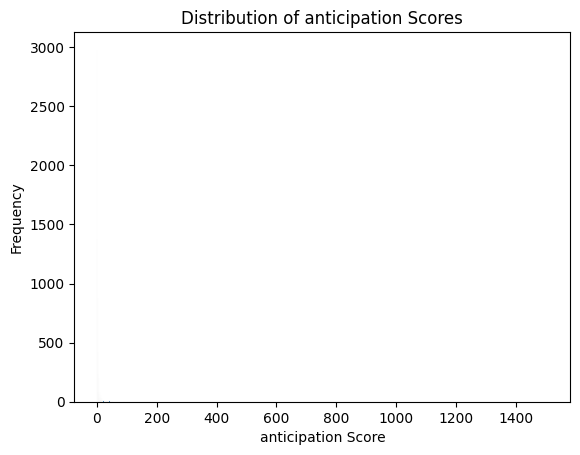

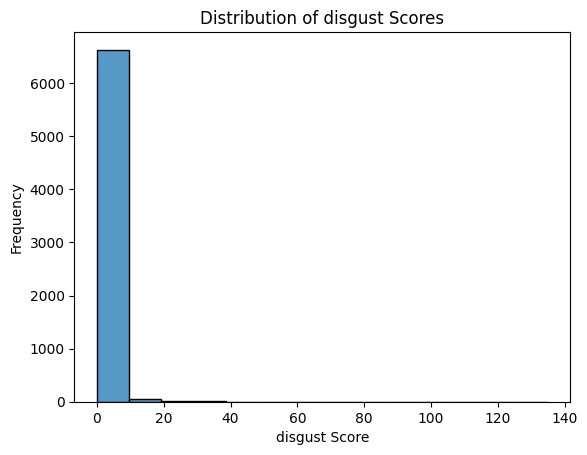

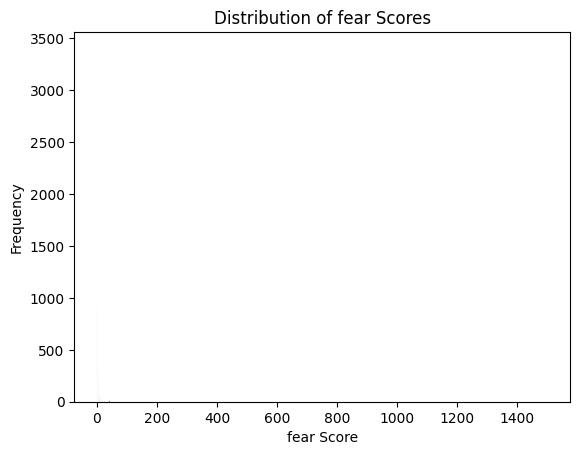

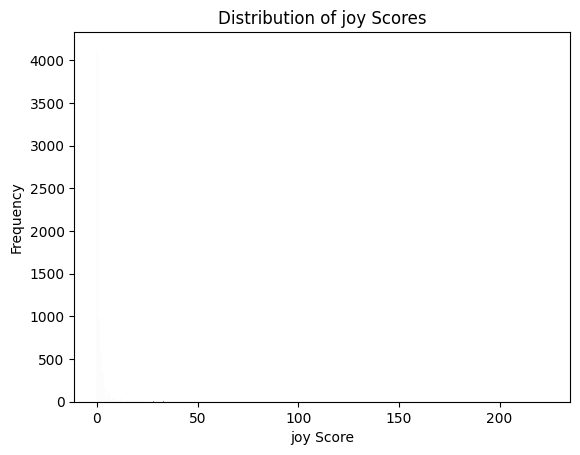

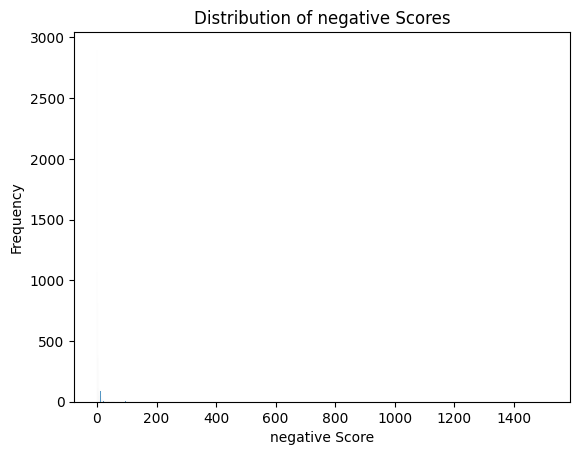

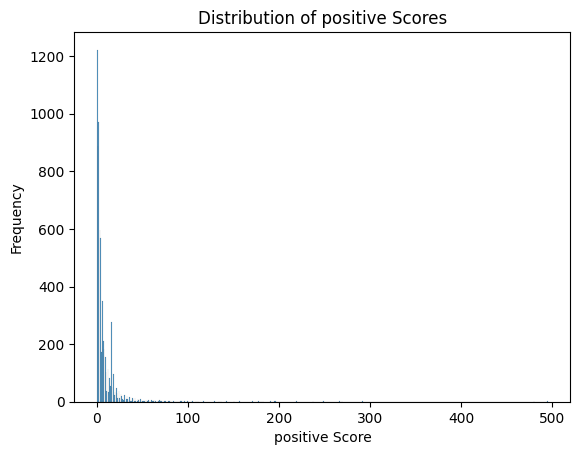

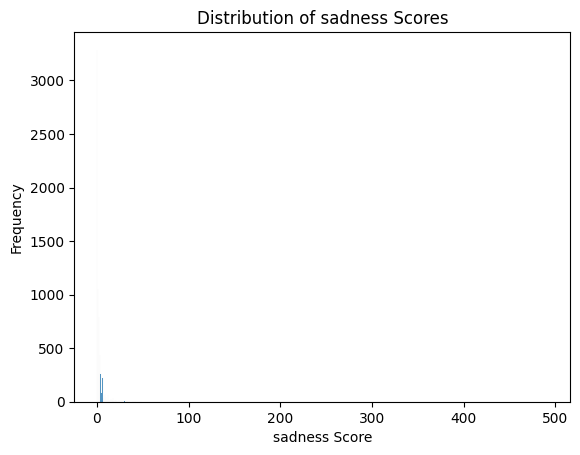

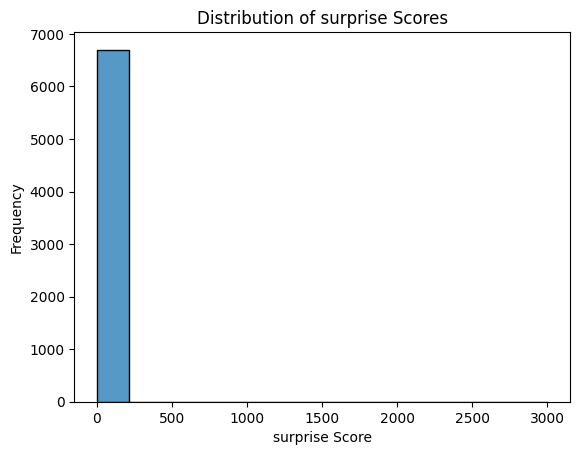

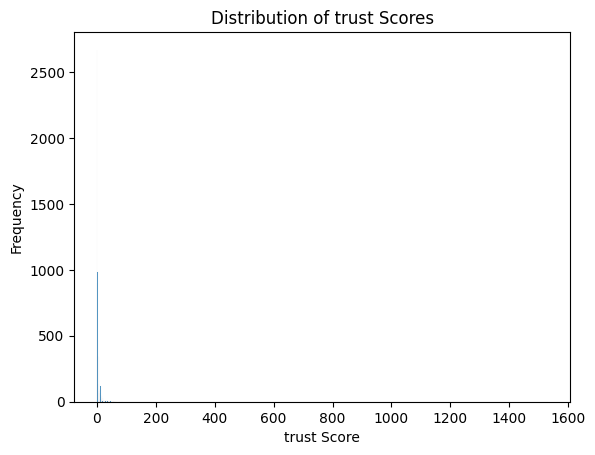

In [125]:
# Plot emotion distributions
for emotion in emotions:
    sns.histplot(grouped_data[emotion])
    plt.title(f'Distribution of {emotion} Scores')
    plt.xlabel(f'{emotion} Score')
    plt.ylabel('Frequency')
    plt.show()

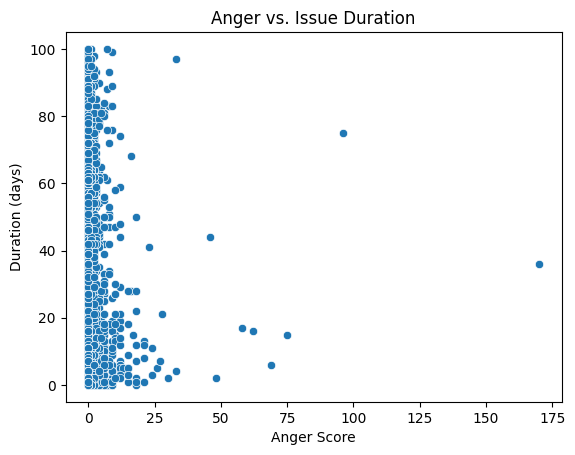

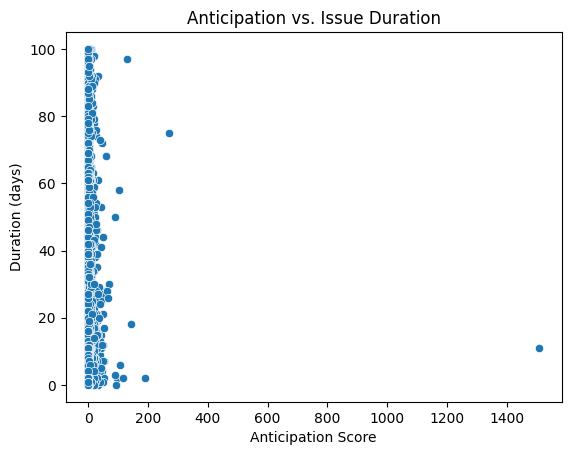

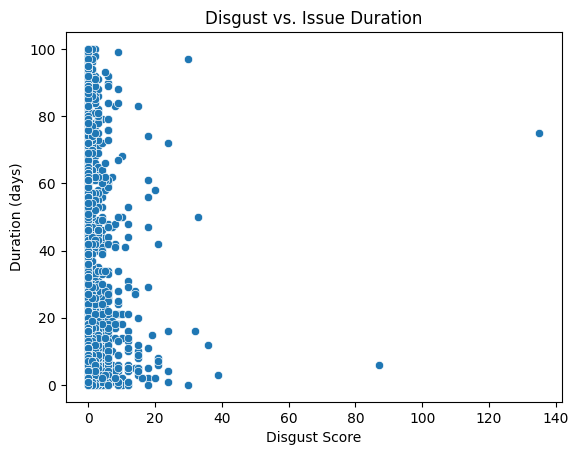

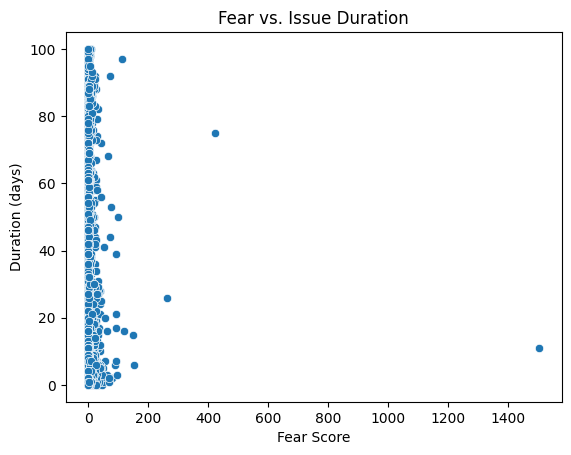

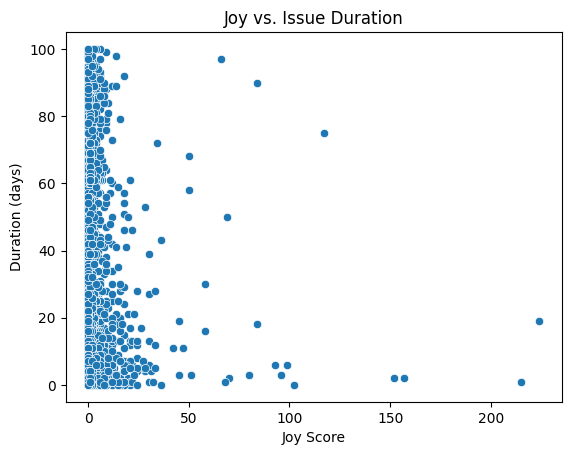

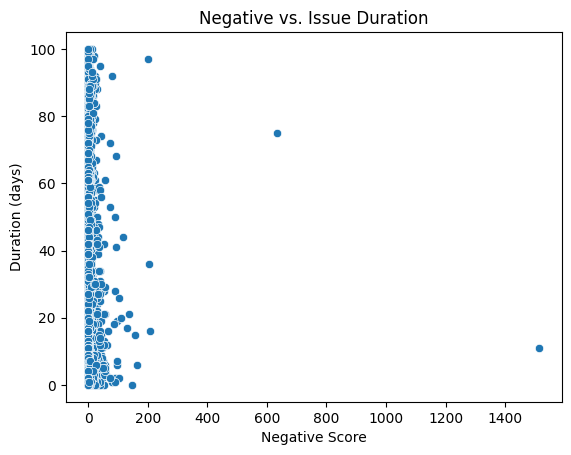

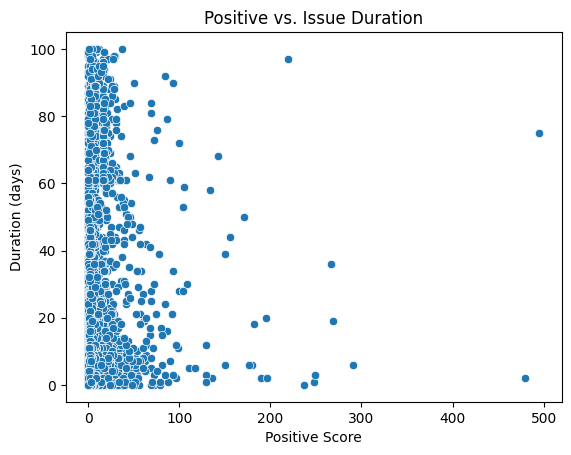

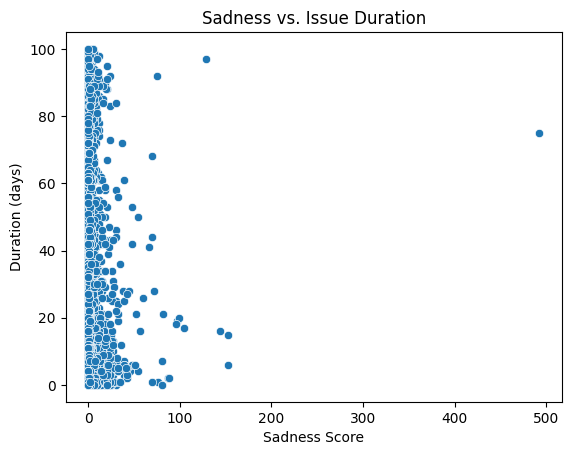

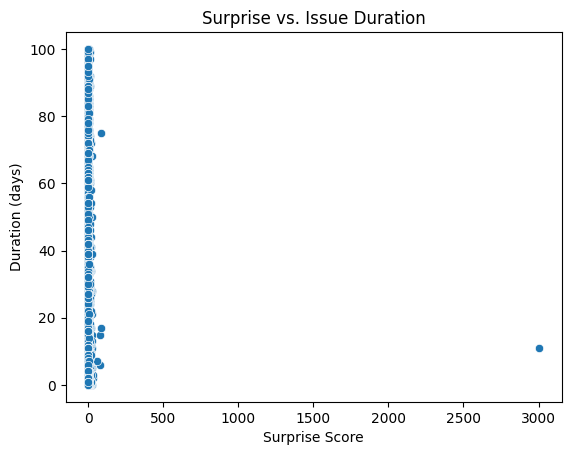

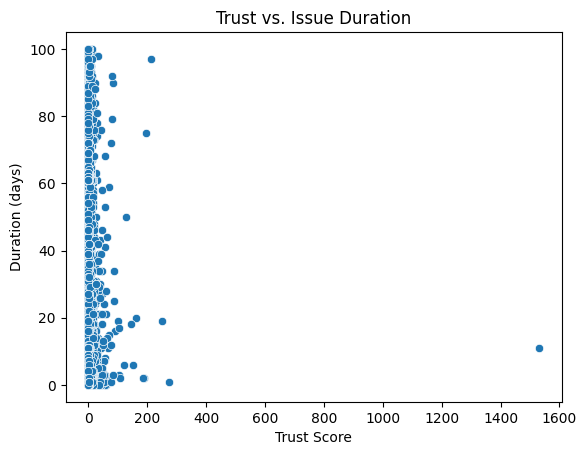

In [126]:
# Relationship between emotions and issue duration
for emotion in emotions:
    sns.scatterplot(x=emotion, y='duration', data=grouped_data)
    plt.title(f'{emotion.capitalize()} vs. Issue Duration')
    plt.xlabel(f'{emotion.capitalize()} Score')
    plt.ylabel('Duration (days)')
    plt.show()

## Feature Extraction

In [129]:
# Check for non-numeric columns and collections.defaultdict
non_numeric_columns = grouped_data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['commentList.body.preprocessed', 'sentiment', 'emotion_scores'], dtype='object')


In [143]:
# Ensure numeric features are numeric
numeric_features = ['user_activity', 'total_reactions', 'positive_reactions',
       'negative_reactions', 'reaction_ratio', 'label_count',
       'update_frequency','duration', 'num_comments', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound',
                    'anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
for col in numeric_features:
    if col in grouped_data.columns:
        grouped_data[col] = pd.to_numeric(grouped_data[col], errors='coerce')

In [144]:
print(grouped_data.columns)

Index(['user_activity', 'total_reactions', 'positive_reactions',
       'negative_reactions', 'reaction_ratio', 'label_count',
       'update_frequency', 'duration', 'sentiment_neg', 'sentiment_neu',
       'sentiment_pos', 'sentiment_compound', 'num_comments', 'emotion_scores',
       'anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'],
      dtype='object')


In [154]:
# Drop 'id' and 'commentList.body.preprocessed' columns
grouped_data = grouped_data.drop(columns=['id', 'commentList.body.preprocessed','sentiment','emotion_scores'])

In [155]:
# Handle any NaN values if they exist
grouped_data[numeric_features] = grouped_data[numeric_features].fillna(0)  # or grouped_data[numeric_features].dropna()

## Modeling and Evaluation

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [156]:
# Standardize/Normalize features
scaler = StandardScaler()
grouped_data[numeric_features] = scaler.fit_transform(grouped_data[numeric_features])

In [157]:
# Assuming 'duration' is your target variable's column name
X = grouped_data.drop(columns=['duration'])
y = grouped_data['duration']

In [158]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Ensure both train and test sets have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

### Random Forest Regression

In [161]:
# Model training with hyperparameter tuning
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [190]:
# Evaluate the model
rfr_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

In [191]:
print(f'Random Forest Regressor - MSE: {rfr_rfr}, R²: {r2_rfr}')

Random Forest Regressor - MSE: 0.1006532054045957, R²: 0.9037840680623622


### Best Random Forest Regression

In [162]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [210]:
# Evaluate model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Random Forest Regressor - MSE: {mse}, R²: {r2}')

Best Random Forest Regressor - MSE: 0.09540023940988968, R²: 0.9088054582564025


### Grading Boosting Regression

In [167]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [168]:
# Predict on the test set
y_pred_gbr = gbr.predict(X_test)

In [169]:
# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

In [170]:
print(f'Gradient Boosting Regressor - MSE: {mse_gbr}, R²: {r2_gbr}')

Gradient Boosting Regressor - MSE: 0.10939128439314937, R²: 0.8954312052812033


### Voting Regression

In [171]:
# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Voting Regressor
voting_reg = VotingRegressor(estimators=[('gbr', gbr), ('rfr', rfr)])
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr', GradientBoostingRegressor(random_state=42)),
                            ('rfr', RandomForestRegressor(random_state=42))])

In [189]:
# Predict on the test set
y_pred_rfr = rfr.predict(X_test)

In [172]:
# Predict on the test set
y_pred_voting = voting_reg.predict(X_test)

In [173]:
# Evaluate the model
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f'Voting Regressor - MSE: {mse_voting}, R²: {r2_voting}')

Voting Regressor - MSE: 0.10006374060231947, R²: 0.9043475464440736


### Best Grading Boosting Regression

In [174]:
# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [175]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [176]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best parameters from GridSearchCV: {best_params}')

Best parameters from GridSearchCV: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [177]:
# Train Gradient Boosting Regressor with best parameters
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=5, random_state=42)

In [178]:
# Predict on the test set
y_pred_best_gbr = best_gbr.predict(X_test)

In [179]:
# Evaluate the model
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

print(f'Best Gradient Boosting Regressor - MSE: {mse_best_gbr}, R²: {r2_best_gbr}')

Best Gradient Boosting Regressor - MSE: 0.09540023940988968, R²: 0.9088054582564025


### Models Performance

In [192]:
model_performance = {'Random Forest': rfr_rfr, 'Gradient Boosting': mse_gbr, 'Best Gradient Boosting': mse_best_gbr}

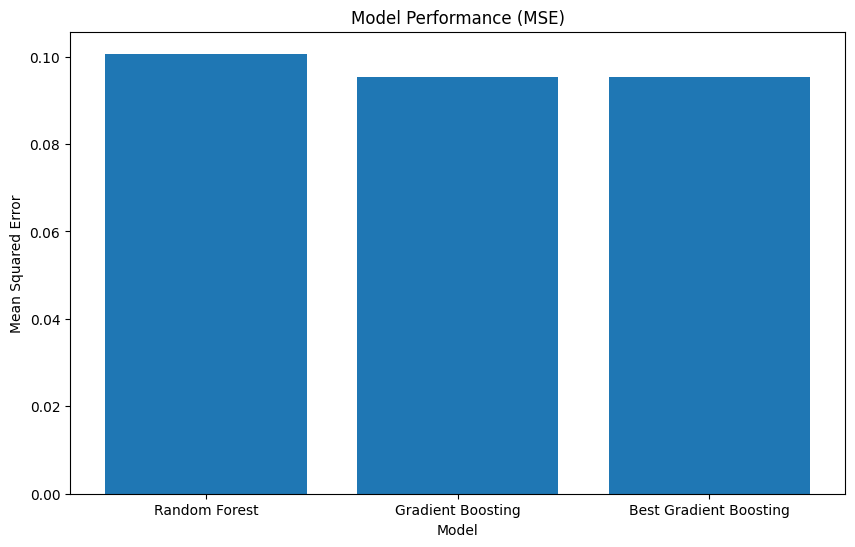

In [193]:
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.title('Model Performance (MSE)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

### Cross-Validation

In [180]:
# Cross-validation
cv_results = cross_validate(best_gbr, X, y, cv=5, scoring=('neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'))
cv_results_df = pd.DataFrame(cv_results)

# Print cross-validation results
print("Cross-Validation Results:")
print(cv_results_df.mean())

Cross-Validation Results:
fit_time                                   2.483132
score_time                                 0.009802
test_neg_mean_squared_error               -0.091560
test_r2                                    0.893022
test_neg_mean_absolute_error              -0.138336
test_neg_mean_absolute_percentage_error   -0.468324
dtype: float64


### Additional Metrics

In [181]:
# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_gbr = r2_score(y_test, y_pred_best_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_best_gbr)
mape_gbr = mean_absolute_percentage_error(y_test, y_pred_best_gbr)

print(f'Gradient Boosting Regressor - MSE: {mse_gbr}, R²: {r2_gbr}, MAE: {mae_gbr}, MAPE: {mape_gbr}')

Gradient Boosting Regressor - MSE: 0.09540023940988968, R²: 0.9088054582564025, MAE: 0.14462891975400652, MAPE: 0.4329152814907027


### Feature Importance

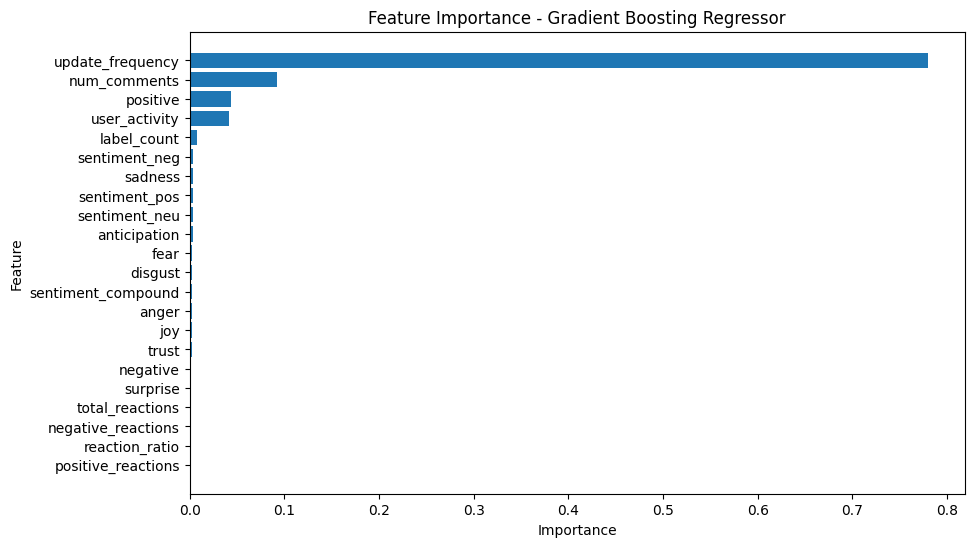

In [182]:
# Feature importance
feature_importances = best_gbr.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

### Correlation Heatmap

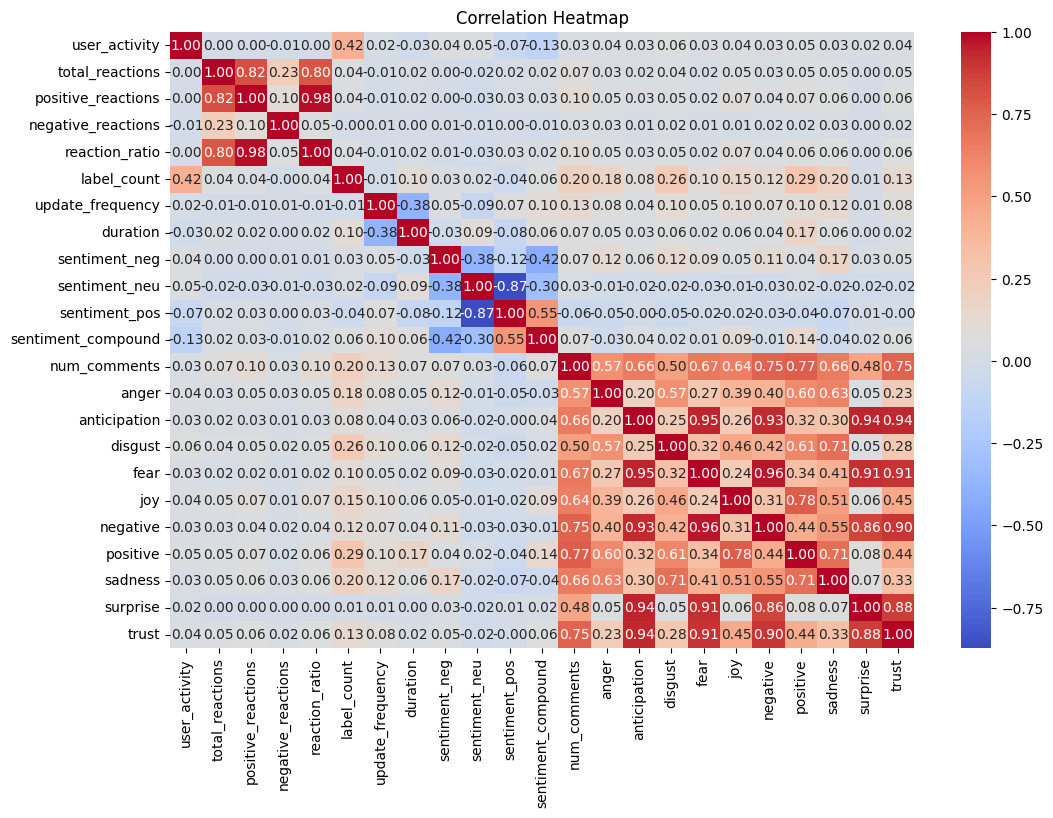

In [183]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = grouped_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Feature Distributions

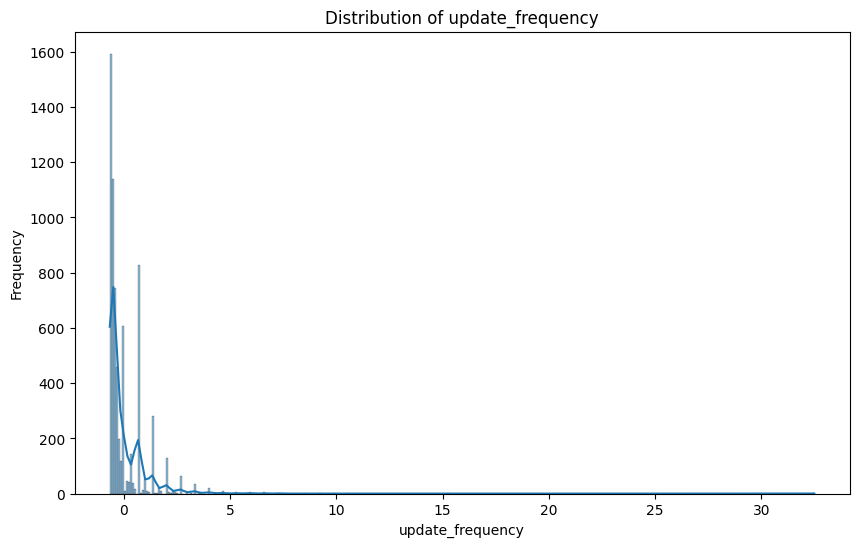

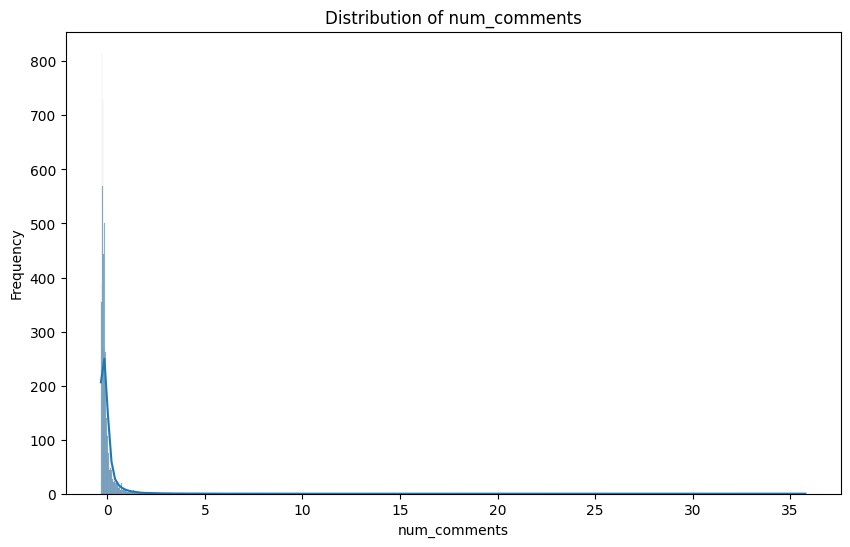

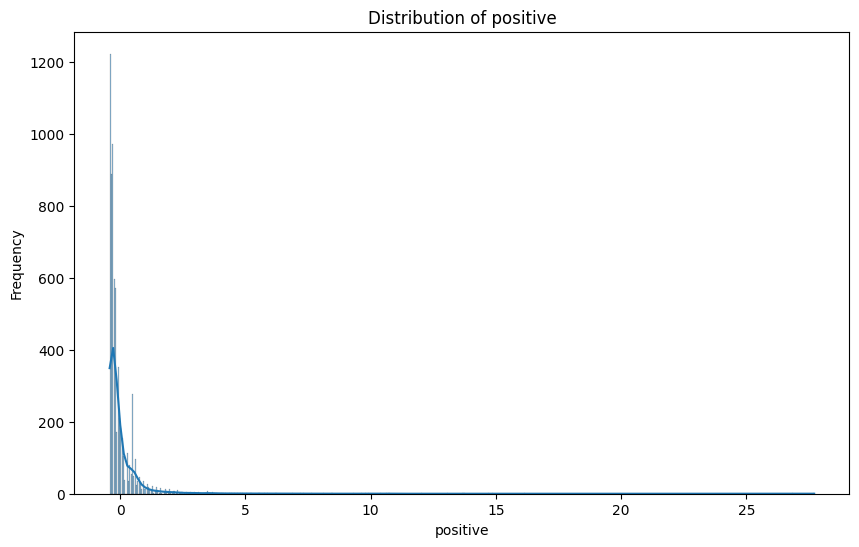

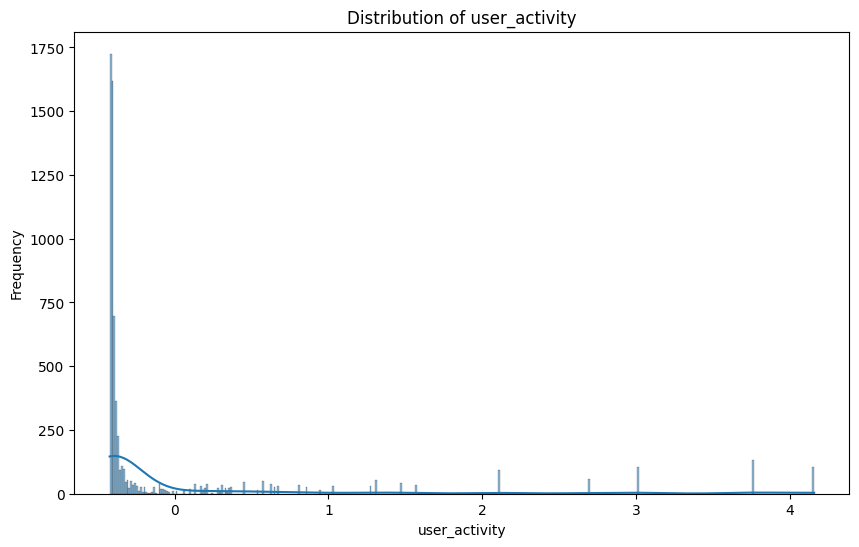

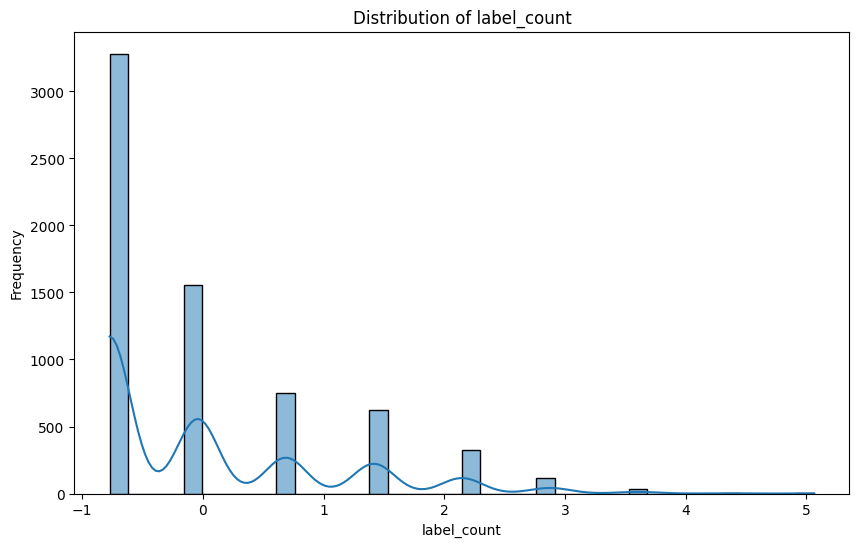

In [184]:
# Feature Distributions
top_features = feature_importance_df['Feature'].head(5)
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(grouped_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Residual Plot

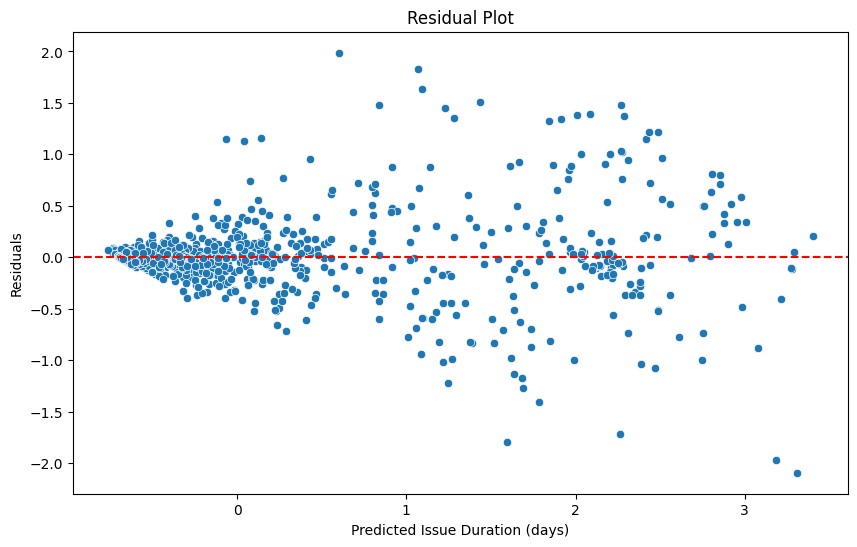

In [203]:
from sklearn.metrics import mean_squared_error

y_pred = best_gbr.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Issue Duration (days)')
plt.ylabel('Residuals')
plt.show()

### Actual vs. Predicted Plot

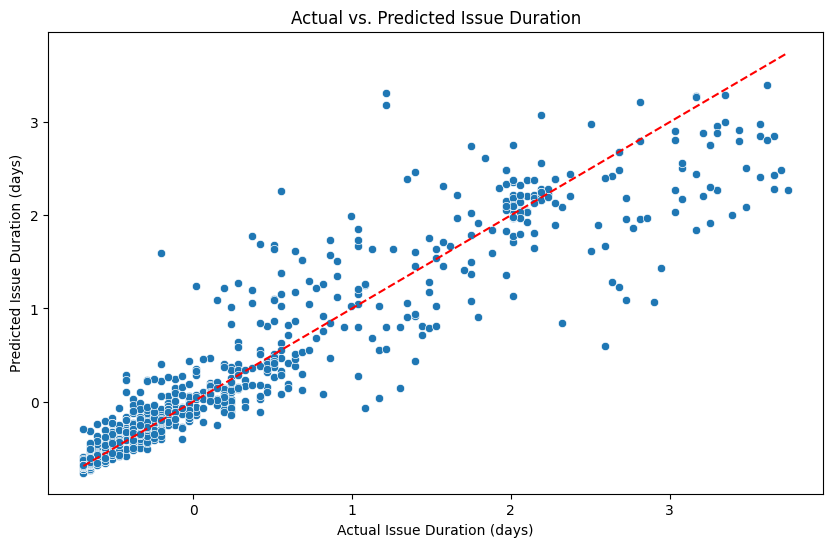

In [202]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Issue Duration')
plt.xlabel('Actual Issue Duration (days)')
plt.ylabel('Predicted Issue Duration (days)')
plt.show()